# Test 11: t-test of a regression coefficient

## Objective

- To investigate the significance of the regression coefficient of $y$ on $x$

## Assumptions

- For every value of $x$, $y$ is normally distributed
- For every value of $x$, the variance of $y$ remains constant (homoscedasticity)

## Method

- Take $N$ samples comparising of data $(x_0, x_1, ... x_k, y)$
    - Implying that there are $k+1$ coefficients to estimate, including constant $x_0$
    
- A linear regression assumes the following relationship: $y = A + B (x - \bar{x})$
    - In this case, $A$ and $B$ are some unknown population parameters 

- Compute coefficients $\hat{\beta}$ using: $$\hat{\beta} = (x_i^\text{T}x_i)^{-1} \cdot x_i^{\text{T}}y_i$$

- Compute the standard error of the coefficient estimates $\hat{\beta}$: $$SE[\hat{\beta}] = \text{diag}(\sqrt{MSE \cdot (x_i^Tx_i)^{-1}})$$
    - How to compute MSE:
    - Compute the residuals from the estimates of $\hat{\beta}$: $$\hat{\epsilon} = y_i - x_i \cdot \hat{\beta} $$
    - Then compute the mean squared errors (MSE) from the residuals $$ MSE = \frac{\sum \hat{\epsilon}^2}{n - k - 1} $$

- Finally, using the computed $\hat{\beta}$ and $SE[\hat{\beta}]$, we can compute the test statistic $t$
$$
    t = \frac{\hat{\beta}}{SE[\hat{\beta}]}
$$

### Textbook method 

- Take a sample comprising $N$ paired samples of $(x_i, y_i)$
- A linear regression assumes the following relationship: $y = A + B (x - \bar{x})$
    - In this case, $A$ and $B$ are some unknown population parameters 
- Compute the sample estimate $b$ which is some estimate of the population parameter $B$
$$\begin{aligned}
    b &= \frac{\sum x_i y_i - \frac{1}{n} \sum x_i \sum y_i}{\sum x_i^2 - \frac{1}{n} (\sum x_i)^2}
\end{aligned}$$

- The sample variance of $x$ values is 
$$
    s_x^2 = \frac{\sum (x_i - \bar{x})^2}{n-1}
$$

- The sample variance of $y$ values CONDITIONING ON $x$ is
$$
    s_{y | x}^2 = \frac{\sum (y_i - \bar{y} - b \cdot (x_i - \bar{x}))^2}{n-2}
$$

- In such a set up, the test statistic is:
$$
    t = \frac{b \cdot s_x}{s_{y | x}} \sqrt{n - 1}
$$

- The test statistic follows a student's t distribution with $n-2$ degrees of freedom

- Generally, only 2-tailed test is valid. 1-tailed test is valid only under specific alternative hypothesis

## Example

- Problem
    - In testing for individuals' driving reaction time, there are 2 possible tests. Composite test (cheaper), vs vehicle simulator test.
    - We want to investigate the relationship between the results from the two tests
    - Using a sample $n= 12$, we compute the regression set up above
    - We find that $b = 5.029$, and $t = 6.86$

    
- Conclusion
    - Remember, the comparison for $t$ is a student's t distribution with $n-2$ degrees of freedom
    - The acceptance region for the null hypothesis is −2.23 < t < 2.23. 
    - Since the computed t value lies outside the acceptance region we conclude that slope (b coefficient) is significantly greater than zero and a significant regression exists.

    - Notice that the test **does not** tell us how good a predictor x is of y, only that the regression is significant.

In [325]:
sum_xi = 766
sum_yi = 1700
sum_xi_sq = 49068
sum_yi_sq = 246100
sum_xi_yi = 109380

n = 12
xbar = 68.83
ybar = 141.67

degrees_of_freedom = n - 2

sx_sq = 15.61
sy_sq = 478.8
s_ygivenx_sq = 92.4

b = (
    (sum_xi_yi - (1/n * sum_xi * sum_yi)) / \
    (sum_xi_sq - (1/n * sum_xi**2))
)
t = b * (sx_sq/s_ygivenx_sq)**0.5 * ((n-1)**0.5)
t

6.855740073902458

## Proof by simulation that test statistic is t-distribution (book approach)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
SAMPLE_SIZE = 100
NUM_FEATURES = 2
UNKNOWN_COEFFICIENT = np.append(np.random.uniform(-5,-3, size=NUM_FEATURES-1), 0)
UNKNOWN_CONSTANT = np.random.uniform(-5,5)

def get_single_test_statistic_sample():
    xi = np.random.normal(0, 5, SAMPLE_SIZE*NUM_FEATURES).reshape(SAMPLE_SIZE, NUM_FEATURES)
    yi = (
        UNKNOWN_CONSTANT + 
        np.sum(UNKNOWN_COEFFICIENT * (xi - np.mean(xi, axis=0)), axis=1) + 
        np.random.normal(0, 5, SAMPLE_SIZE)
    ).reshape(SAMPLE_SIZE, -1)

    sum_xi = np.sum(xi, axis=0)
    sum_yi = np.sum(yi, axis=0)
    sum_xi_sq = np.sum(xi**2, axis=0)
    # sum_yi_sq = np.sum(yi**2, axis=0)
    sum_xi_yi = np.sum(xi * yi, axis=0)
    xbar = np.mean(xi, axis=0)
    ybar = np.mean(yi, axis=0)
    # degrees_of_freedom = SAMPLE_SIZE - 2

    b = (
        (sum_xi_yi - (1/SAMPLE_SIZE * sum_xi * sum_yi)) / \
        (sum_xi_sq - (1/SAMPLE_SIZE * sum_xi**2))
    )
    a = yi - (xi @ b.T)

    sx_sq = np.sum((xi - xbar)**2, axis=0) / (SAMPLE_SIZE-1)
    s_ygivenx_sq = np.sum((yi - ybar - (b * (xi - xbar)))**2, axis=0) / (SAMPLE_SIZE-2)

    t_statistic_coefficients = b * (sx_sq/s_ygivenx_sq)**0.5 * (SAMPLE_SIZE-1)**(0.5)
    return t_statistic_coefficients

get_single_test_statistic_sample()

array([-42.66875125,   0.65311004])

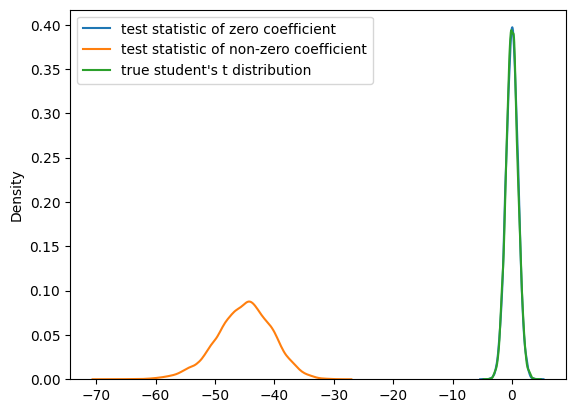

In [176]:
test_statistic_distribution_zero_coefficient = np.array([get_single_test_statistic_sample()[-1] for _ in range(10_000)])
test_statistic_distribution_nonzero_coefficient = np.array([get_single_test_statistic_sample()[-2] for _ in range(10_000)])
degrees_of_freedom = SAMPLE_SIZE - 2
true_students_t_distribution = np.random.standard_t(degrees_of_freedom, 10_000)

sns.kdeplot(test_statistic_distribution_zero_coefficient, label='test statistic of zero coefficient')
sns.kdeplot(test_statistic_distribution_nonzero_coefficient, label='test statistic of non-zero coefficient')
sns.kdeplot(true_students_t_distribution, label="true student's t distribution")
plt.legend()

## Proof by simulation that test statistic is t-distribution (my approach)

In [338]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [318]:
# Simulated data
SAMPLE_SIZE = 100
NUM_FEATURES = 2
UNKNOWN_COEFFICIENT = np.append(np.random.uniform(-3,3, size=NUM_FEATURES-1), 0)
UNKNOWN_CONSTANT = np.random.uniform(-5,5)

def get_single_test_statistic_sample():
    ## Take a sample of x values. x must be normally distributed, else y will not be normally distributed
    xi = np.random.normal(0, 1, SAMPLE_SIZE * NUM_FEATURES).reshape(SAMPLE_SIZE, NUM_FEATURES)

    ## Define a relationship between x and y using the unknown coefficients/constant
    ## Remember, residuals in OLS are assumed to be normal by assumption, so add some normal random error
    yi = (
        UNKNOWN_CONSTANT + 
        np.sum(UNKNOWN_COEFFICIENT * (xi - np.mean(xi, axis=0)), axis=1) + 
        np.random.normal(0, 5, SAMPLE_SIZE)
        # np.random.exponential(5, SAMPLE_SIZE)
    ).reshape(SAMPLE_SIZE, -1)

    # Compute all coefficients and constant
    X = np.hstack((
        np.ones((SAMPLE_SIZE, 1)), ## add column of 1s to estimate OLS constant
        xi - np.mean(xi, axis=0) ## features of OLS is the de-meaned value of the features
    )).reshape(SAMPLE_SIZE, NUM_FEATURES+1)
    
    beta_hat = (
        np.linalg.inv(X.T @ X) @ X.T @ yi
    ).reshape(NUM_FEATURES+1, -1)

    # Compute residuals based on the estimated coefficients
    residuals = (yi - X @ beta_hat).reshape(SAMPLE_SIZE, -1)

    # Compute Mean squred errors
    #(n - k - 1) degrees of freedom, we take an additional -1 to account for the constant
    mse = np.sum(residuals**2) / (SAMPLE_SIZE - NUM_FEATURES - 1) 

    # Compute standard error of coefficient estimate
    # print((mse * np.linalg.inv(X.T @ X)).shape)
    SE_beta_hat = np.sqrt(
        # Take diagonal of square matrix
        np.diag(
            (mse * np.linalg.inv(X.T @ X)).reshape(NUM_FEATURES+1, NUM_FEATURES+1)
        ).reshape(-1, NUM_FEATURES+1) 
    )
    
    # Compute t-statistic
    t_statistic = beta_hat.reshape(-1, NUM_FEATURES+1) / SE_beta_hat
    
    return t_statistic.flatten()

get_single_test_statistic_sample()

array([-8.08277054, -1.02863157,  0.38864829])

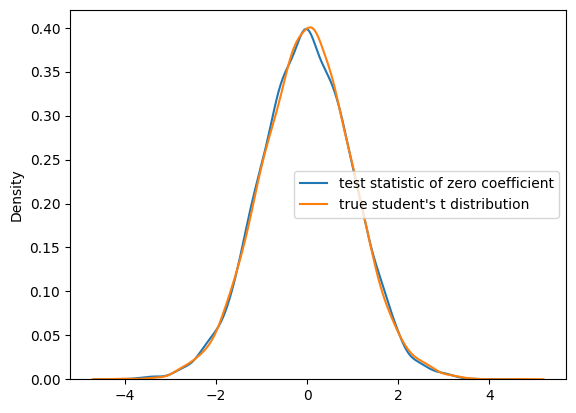

In [317]:
test_statistic_distribution_zero_coefficient = np.array([get_single_test_statistic_sample()[-1] for _ in range(10_000)])
test_statistic_distribution_nonzero_coefficient = np.array([get_single_test_statistic_sample()[-2] for _ in range(10_000)])
test_statistic_distribution_nonzero_constant = np.array([get_single_test_statistic_sample()[0] for _ in range(10_000)])

degrees_of_freedom = SAMPLE_SIZE - 2
true_students_t_distribution = np.random.standard_t(degrees_of_freedom, 10_000)

sns.kdeplot(test_statistic_distribution_zero_coefficient, label='test statistic of zero coefficient')
sns.kdeplot(test_statistic_distribution_nonzero_coefficient, label='test statistic of non-zero coefficient')
sns.kdeplot(true_students_t_distribution, label="true student's t distribution")
plt.legend()